
# Project: Investigate a Dataset (No-show-appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I wll give a short introduction about the data that I select (**No show appointments**) <br>
<br><span style="color:gray">***This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.***</span><br>
<br>**Here im gonna describe what is the meaning of each columns**
<br>**1 PatientId**:Identification of a patient.<br>**2 AppointmentID**:Identification of each appointment.<br>**3 Gender**:Male or Female.<br> **4 ScheduledDay**:tells us on what day the patient set up their appointment.<br>**5 AppointmentDay**	:The day of the actuall appointment, when they have to visit doctor.<br> **6 Age**:How old is the patient.<br>**7 Neighbourhood**:Where the appointment takes place.<br>**8 Scholarship**:True of False , mean that they covered by the program of the government of brazil.<br>**9 Hipertension**:True or False, we will correct the spelling late.<br>**1- Diabetes**:True or False.<br>**11 Alcoholism**:True or False.<br>**12 Handcap**:True or False.<br>**13 SMS_received**:1 or more messages sent to the patient.
<br>**14 No-show**:True or False, so if NO that means he came if YES that means he did not come.





In [47]:
# here i will import all the packages that i need in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tha magic shortcut   
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [48]:
# here im gonna load my data as NSA (No show appointments)
NSA=pd.read_csv('No_show_appointments.csv')
# i will show the first 5 lines of the data 
NSA.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [49]:
# here we will see how many patinets we have and how many variables
NSA.shape

(110527, 14)

we can see here that there are no null values

In [50]:
#i will show the type of each varibale and if i have null values or not
NSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values in the data<br> but we need to cange to columns to date , i will do do it in data cleaning

In [51]:
# i will show a brief describtive statistic about the data
NSA.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we can notice something weird that the min age is -1!!!

The max age is 115

the mean of the ages is approximately 37

In [52]:
# i will chech if there are a duplicated values
sum(NSA.duplicated())

0

In [53]:
#now we check if there are null values
NSA.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no null values


### Data Cleaning 

In [54]:
# After discussing the structure of the data we will do some cleaning to make it ready for visualization

# First we will check how many rows contain less than 
lesszero=NSA[NSA['Age']< 0]


lesszero.shape


(1, 14)

one row contains less than zero so we will delete it

In [55]:
#i will delete the row that contain less than zero
NSA=NSA[NSA['Age']>=0]
# i will check for the number of the rows after exclude the rows that contain Age = -1
NSA.shape

(110526, 14)

one row has deleted

In [56]:
# this function when we call it ,it will change the type to date
def change_type_to_time(x):
    NSA[x]=pd.to_datetime(NSA[x])
    return NSA.dtypes


In [57]:
#i will call the function to change the type of sum columns to date
change_type_to_time('AppointmentDay')    
change_type_to_time('ScheduledDay')   

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [58]:
# we can now how many days the patient wait from the day he set up the appintment till the actual date of the appointment
NSA['Waitdays']=NSA['AppointmentDay'] - NSA['ScheduledDay']
NSA['Waitdays'].describe()

count                        110526
mean      9 days 17:08:42.047952517
std      15 days 05:51:31.240428096
min               -7 days +10:10:40
25%               -1 days +15:41:32
50%                 3 days 11:22:33
75%         14 days 07:41:37.750000
max               178 days 13:19:01
Name: Waitdays, dtype: object

In [59]:
# i will delete some columns that i will not use it in the visualization
NSA=NSA.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1)


In [60]:
#change the name of the columns and correcting them
NSA=NSA.rename(columns={'Hipertension':'Hypertension'})
NSA=NSA.rename(columns={'Handcap':'Handicap'})
NSA.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waitdays
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


In [61]:
# we will see how many unique value for each columns cleaning
col=NSA.columns
for x in col:
    print(x,':',NSA[x].nunique())

Gender : 2
Age : 103
Neighbourhood : 81
Scholarship : 2
Hypertension : 2
Diabetes : 2
Alcoholism : 2
Handicap : 5
SMS_received : 2
No-show : 2
Waitdays : 89711


In [62]:
#here i will split who shows and who did not
attended=NSA[NSA['No-show']=='No']
noattended=NSA[NSA['No-show']=='Yes']

<a id='eda'></a>
## Exploratory Data Analysis

In [63]:
#the number of who attended
noattended.groupby('No-show').count()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Waitdays
No-show,,,,,,,,,,
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [64]:
#the number of who did not attend
attended.groupby('No-show').count()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Waitdays
No-show,,,,,,,,,,
No,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207


### Research Question 1 (is there a larg percentage of those who did not attend?)

In [65]:
#here i will convert the number of who show and who did not to a percentage
total=NSA.shape[0]
show_perc=attended.shape[0]/total
noshow_perc=noattended.shape[0]/total
perc=[show_perc,noshow_perc]
perc

[0.7980656135208005, 0.20193438647919945]

([<matplotlib.patches.Wedge at 0x192b26fd700>,
 [Text(-0.6519599194491498, -0.885973060217893, 'attended'),
  Text(0.7112290482813175, 0.9665160323972135, 'not attended')],
 [Text(-0.35561450151771806, -0.4832580328461234, '79.81%'),
  Text(0.41488361149743513, 0.5638010188983745, '20.19%')])

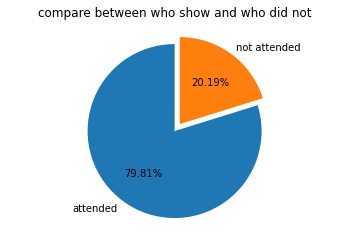

In [66]:
#a oie chart for the show , no show perc
plt.title('compare between who show and who did not')
plt.axis('equal')
explode=(0,0.1)
plt.pie(perc,labels=['attended','not attended'],autopct='%1.2f%%',startangle=90,explode=explode)

the number of who attended is 4 times the number of who did not, it seems to be a larg percentage for those who did not attend

<AxesSubplot:>

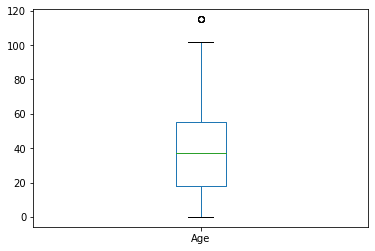

In [67]:
NSA['Age'].plot(kind='box')

we can see here that there is an outlier its greater than 115<br>we can see that 75% are below 55

### Research Question 2 (who attend more females or males?)

Text(0.5, 1.0, 'comparing between who show and who did not depending on the gender')

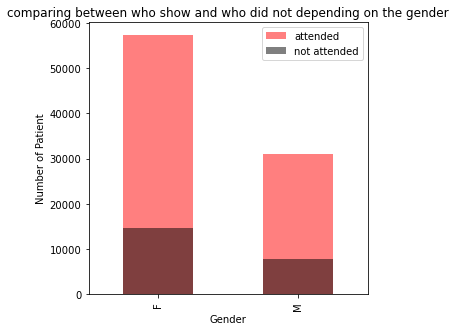

In [68]:
attended['Gender'].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended',figsize=(5,5))
noattended['Gender'].value_counts().plot(kind='bar',alpha=0.5,color='black',label='not attended',figsize=(5,5))
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Number of Patient')
plt.title('comparing between who show and who did not depending on the gender')

maybe they are equal because the number of female approximately twice the number of male as shown below:

In [69]:
NSA.groupby('Gender').count()

,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waitdays
Gender,,,,,,,,,,
F,71839,71839,71839,71839,71839,71839,71839,71839,71839,71839
M,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687


### Research Question 3 (what is the age that get most attendance,non-attendance ?)

Text(0.5, 1.0, 'comparing between who attended and who did mot depend on their age')

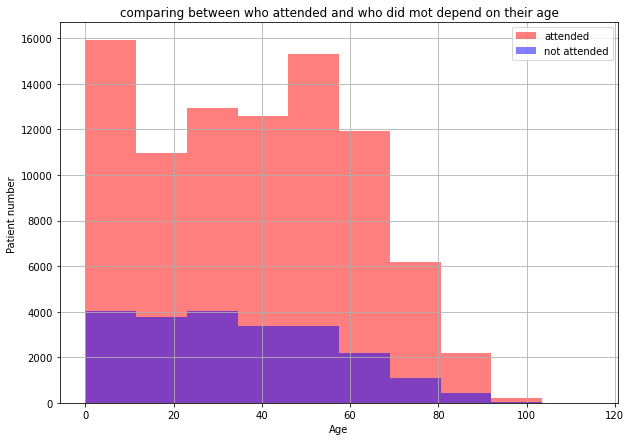

In [70]:
#we will answer the question by hist
plt.figure(figsize=[10,7])
attended['Age'].hist(alpha=0.5,label='attended',color='red')
noattended['Age'].hist(alpha=0.5,label='not attended',color='blue')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Patient number ')
plt.title('comparing between who attended and who did mot depend on their age')

It's clear that the age group from 0 to 10 get the most attendance , and approximately from 23 to 33 get the most non-attendance

as the patient get older , as they less getting an appointment

### Research Question 4  (which Neighbourhood that get the most and lowest of the attendance?)

Text(0.5, 1.0, 'comparing between who show and who did not depend on the Neighbourhood')

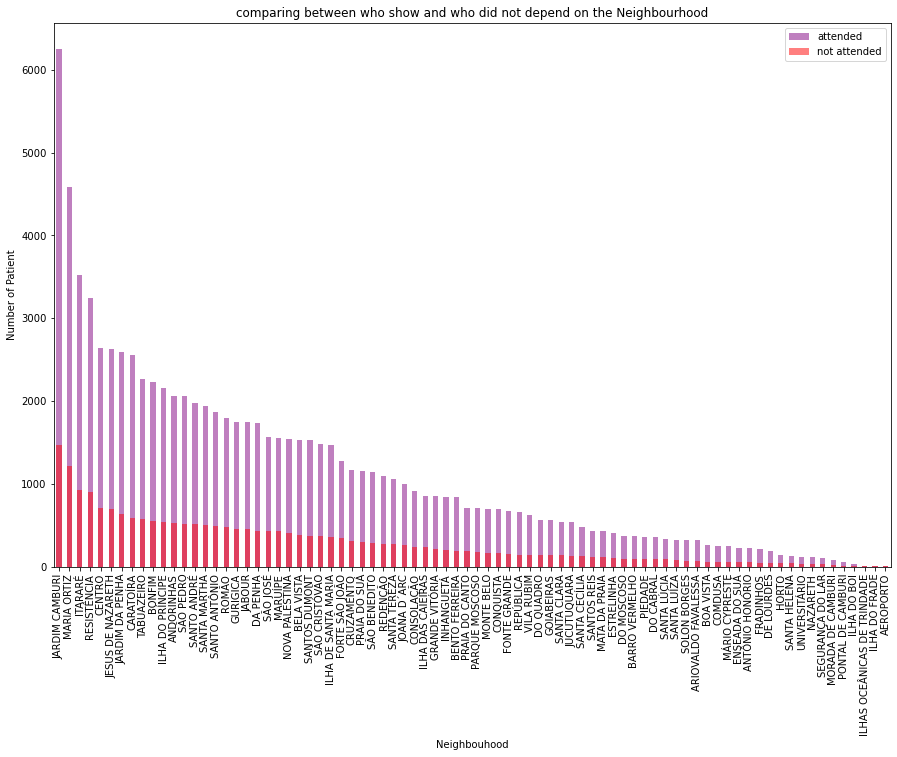

In [71]:
attended['Neighbourhood'].value_counts().plot(kind='bar',alpha=0.5,color='purple',label='attended',figsize=(15,10))
noattended['Neighbourhood'].value_counts().plot(kind='bar',alpha=0.5,color='red',label='not attended',figsize=(15,10))
plt.legend()
plt.xlabel('Neighbouhood')
plt.ylabel('Number of Patient')
plt.title('comparing between who show and who did not depend on the Neighbourhood')

The Neighbourhood that get the most number of attendance is JARDIM CAMBURI and the lowest attendance is AFROPORTO

### Research Question 5  (is there a larger attendance in those who have not a Scholarship comparing with who have ?)

Text(0.5, 1.0, 'comparing between who show and who did not depend on the Scholarship')

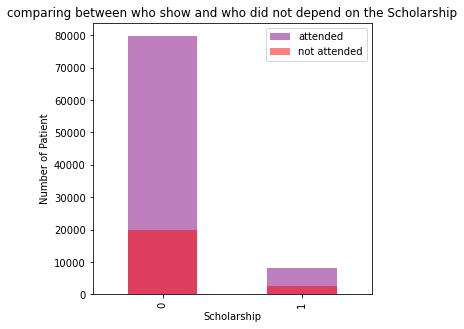

In [72]:
attended['Scholarship'].value_counts().plot(kind='bar',alpha=0.5,color='purple',label='attended',figsize=(5,5))
noattended['Scholarship'].value_counts().plot(kind='bar',alpha=0.5,color='red',label='not attended',figsize=(5,5))
plt.legend()
plt.xlabel('Scholarship')
plt.ylabel('Number of Patient')
plt.title('comparing between who show and who did not depend on the Scholarship')

who have not a Scholarship tends to attend more maybe because they will pay more


<a id='conclusions'></a>
## Conclusions
1:it seems that depend on the Neighbourhood patient attend more or less
<br>2:the most attendance was in the age group that from 0 to 10 and we notice that older get less appointments
<br>3:patients with scholarship attend less compared by who have not scholarship
<br>4:despite of the number of who attended was four times the number of who did not , its considered to be a larg percentage for those who did not attend

The limitation:<br>Some data about the distance between the patient and the neighbourhood are usefull in plotting <br> Some and there are a missing columns like the price , which will affect our understanding for the data<br> Could not find a clear correlation between patient attended and not attended and gender  
